In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

##### [과제] X 데이터를 X_poly 데이터셋으로 변환하여 2차함수로 만들어진 데이터셋을 예측하고 시각화하세요.
----

In [3]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

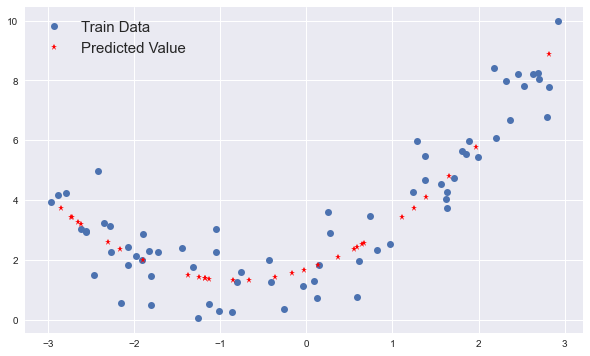

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 11)

# 2차 다항식으로 바꿈
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# 훈련 및 학습
lr = LinearRegression()
lr.fit(X_train_poly,y_train)
y_preds_poly = lr.predict(X_test_poly)

# 시각화
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train, y_train,'o',label='Train Data')
ax.plot(X_test, y_preds_poly,'r*', label='Predicted Value')
ax.legend(fontsize = 15, loc='best')
plt.show()
plt.close()


##### [과제] 아래 Boston 데이터 셋으로 보스턴 주택 가격 예측 모델을 만들고 평가하세요
---

In [9]:
from sklearn.datasets import load_boston

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['PRICE'] = boston.target
print(boston_df.info())
boston_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


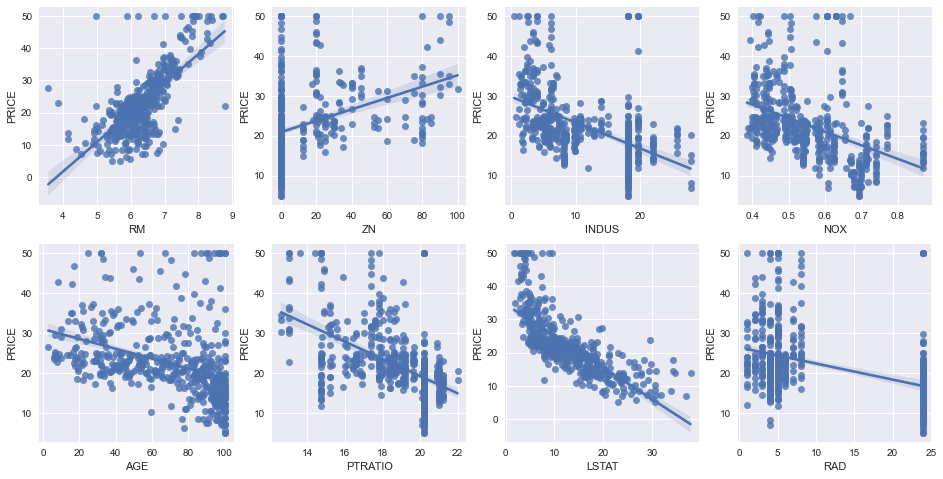

In [10]:
fig, ax = plt.subplots(figsize = (16, 8), ncols = 4, nrows = 2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x = feature, y = 'PRICE', data = boston_df, ax = ax[row][col])

In [11]:
X = boston_df.drop('PRICE', axis = 1)
y = boston_df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 56)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

#회귀 평가 지표
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('mse :', round(mse, 3))
print('rmse :', round(rmse, 3))
print('r2 :', round(r2, 3))

mse : 25.847
rmse : 5.084
r2 : 0.7


In [12]:
# 회귀 계수(기울기)와 y절편

coef = pd.Series(data = np.round(lr.coef_, 3), index = X.columns)

print('y절편 :', round(lr.intercept_, 3), '\n')
print(f'회귀 계수(기울기) : \n{coef.sort_values(ascending= False)}')

y절편 : 31.059 

회귀 계수(기울기) : 
RM          4.491
CHAS        2.490
RAD         0.257
INDUS       0.048
ZN          0.029
B           0.010
AGE         0.003
TAX        -0.011
CRIM       -0.054
LSTAT      -0.502
PTRATIO    -1.002
DIS        -1.224
NOX       -17.410
dtype: float64


In [14]:
# 교차 검증을 이용해 성능 평가

lr = LinearRegression()
X = boston_df.drop(['PRICE'], axis = 1)
y = boston_df['PRICE']

# cross_val_score(lr, X, y, scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc', 'neg_mean_squared_error', 'r2'], cv = 5)
score = cross_validate(lr, X, y, 
                       scoring = ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2'], 
#                        cv = 5, 
                       return_train_score = True)

print('개별 mse :', np.round(-1 * score['test_neg_mean_squared_error'], 3))
print('개별 rmse :', np.round(-1 * score['test_neg_root_mean_squared_error'], 3))
print('개별 r2 score:', np.round(score['test_r2'], 3))
print('평균 mse :', np.round(-1 * score['test_neg_mean_squared_error'].mean(), 3))
print('평균 rmse :', np.round(-1 * score['test_neg_root_mean_squared_error'].mean(), 3))

개별 mse : [12.46  26.049 33.074 80.762 33.314]
개별 rmse : [3.53  5.104 5.751 8.987 5.772]
개별 r2 score: [ 0.639  0.714  0.587  0.079 -0.253]
평균 mse : 37.132
평균 rmse : 5.829


In [67]:
from sklearn.model_selection import StratifiedKFold


score = cross_validate(lr, X, y, 
                       scoring = ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2'], 
                       cv = KFold(5, shuffle = True, random_state = 77), 
                       return_train_score = True)

print('개별 mse :', np.round(-1 * score['test_neg_mean_squared_error'], 3))
print('개별 rmse :', np.round(-1 * score['test_neg_root_mean_squared_error'], 3))
print('개별 r2 score:', np.round(score['test_r2'], 3))
print('평균 mse :', np.round(-1 * score['test_neg_mean_squared_error'].mean(), 3))
print('평균 rmse :', np.round(-1 * score['test_neg_root_mean_squared_error'].mean(), 3))

개별 mse : [18.929 17.919 31.017 20.121 30.332]
개별 rmse : [4.351 4.233 5.569 4.486 5.507]
개별 r2 score: [0.727 0.726 0.604 0.741 0.757]
평균 mse : 23.664
평균 rmse : 4.829
